In [1]:
from os import path, makedirs
from pickle import dump, load
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Utils.haea import HAEA
from Utils.constants import PROPORTIONAL_SELECTION, RANK_SELECTION, TOURNAMENT_SELECTION, ELITIST_SELECTION, RANDOM_SELECTION

# Utils

## Constants

In [2]:
ITERATIONS = 100
CHROMOSOME_LENGTH = 100
DIMENSIONS_LENGTH = 1
POPULATION_LENGTH = 100
GENERATIONS = 200
LIMITS = [0, 1]
POINTS = 400

In [3]:
class AssetType(Enum):
    graphic = 1
    data = 2

## Functions

In [4]:
def save( type, name, data = None ):
    if type == AssetType.graphic:
        filePath = "Multimodal_Assets/Graphics/" + name + ".png"
    else: ### AssetType.data
        filePath = "Multimodal_Assets/Data/" + name + ".pickle"
    if not path.exists( path.dirname( filePath ) ):
        makedirs( path.dirname( filePath ) )
    if type == AssetType.graphic:
        plt.savefig( filePath )
    else: ### AssetType.data
        dump( data, open( filePath, "wb" ) )

In [5]:
def get( name ):
    filePath = "Multimodal_Assets/Data/" + name + ".pickle"

    return load( open( filePath, "rb" ) )

In [6]:
def plot( x, y, isPoints, closes, title = None, name = None ):
    if title:
        plt.title( title )
    if isPoints:
        plt.plot( x, y, "." )
    else:
        plt.plot( x, y )
    if closes:
        if name:
            save( AssetType.graphic, name )
        plt.show()
        plt.close()

In [7]:
def m1( x ):
    return np.sin( 5 * np.pi * x ) ** 6

In [8]:
def m2( x ):
    v = m1( x )
    y = ( x - 0.1 ) / 0.8

    return np.exp( -2.0 * 0.69314718 * y ** 2 ) * v

In [9]:
def m3( x ):
    x = x ** 0.75 - 0.05
    
    return m1( x )

In [10]:
def m4( x ):
    v = m3( x )
    y = ( x - 0.08 ) / 0.854
    
    return np.exp( -2.0 * 0.69314718 * y ** 2 ) * v

# Deterministic Crowding HAEA

## Real

In [11]:
def realDCHAEASteps( function, limits, algorithmName, functionName ):
    x = np.linspace( limits[0], limits[1], POINTS )
    y = function( x )
    
    realDCHAEA = HAEA( function, DIMENSIONS_LENGTH, POPULATION_LENGTH, limits )
    x0, x40, x80, x120, x160, x200 = realDCHAEA.realDCInit( GENERATIONS, RANK_SELECTION )
    
    plot( x, y, False, False, "Initial population" )
    plot( [i.chromosome for i in x0], [function( i.chromosome ) for i in x0], True, True, None, f"{algorithmName}_{functionName}_x0" )
    
    plot( x, y, False, False, "After 40 generations" )
    plot( [i.chromosome for i in x40], [function( i.chromosome ) for i in x40], True, True, None, f"{algorithmName}_{functionName}_x40" )
    
    plot( x, y, False, False, "After 80 generations" )
    plot( [i.chromosome for i in x80], [function( i.chromosome ) for i in x80], True, True, None, f"{algorithmName}_{functionName}_x80" )
    
    plot( x, y, False, False, "After 120 generations" )
    plot( [i.chromosome for i in x120], [function( i.chromosome ) for i in x120], True, True, None, f"{algorithmName}_{functionName}_x120" )
    
    plot( x, y, False, False, "After 160 generations" )
    plot( [i.chromosome for i in x160], [function( i.chromosome ) for i in x160], True, True, None, f"{algorithmName}_{functionName}_x160" )
    
    plot( x, y, False, False, "After 200 generations" )
    plot( [i.chromosome for i in x200], [function( i.chromosome ) for i in x200], True, True, None, f"{algorithmName}_{functionName}_x200" )

### M1

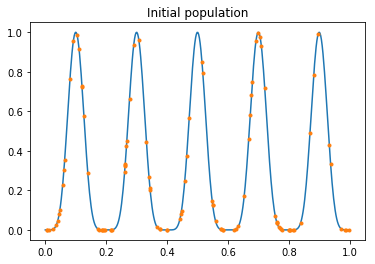

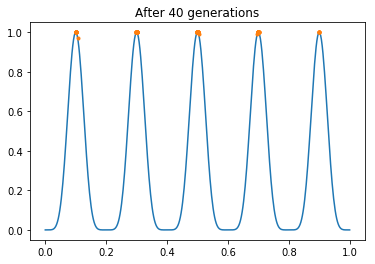

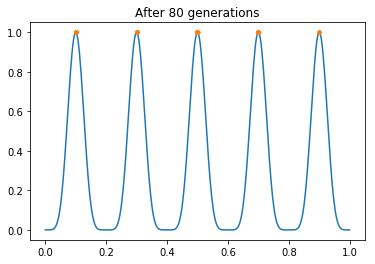

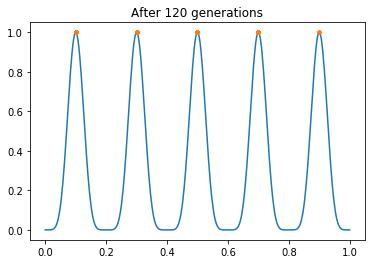

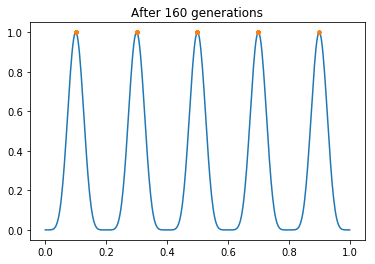

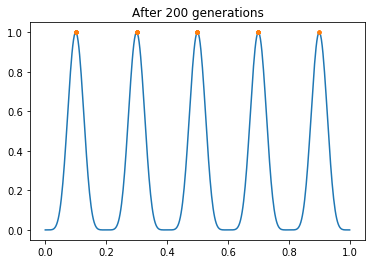

In [12]:
realDCHAEASteps( m1, LIMITS, "realDCHAEA", "M1" )

### M2

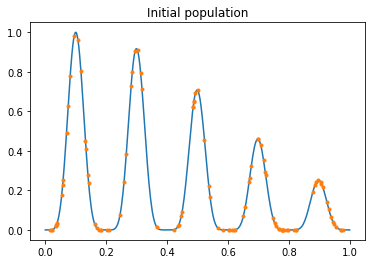

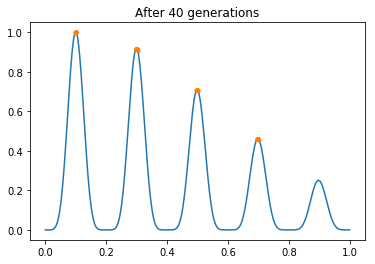

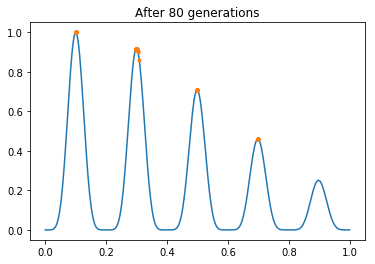

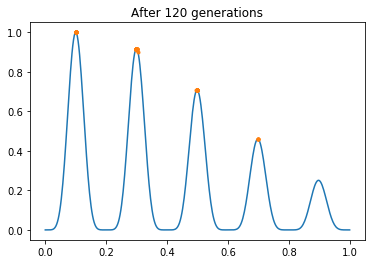

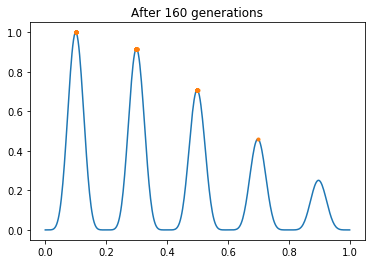

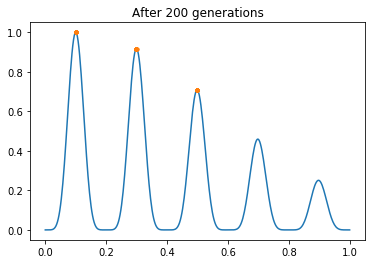

In [13]:
realDCHAEASteps( m2, LIMITS, "realDCHAEA", "M2" )

### M3

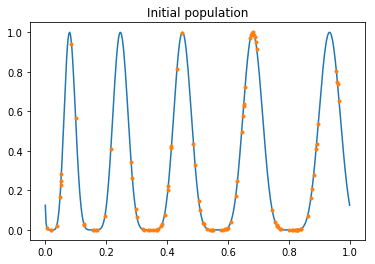

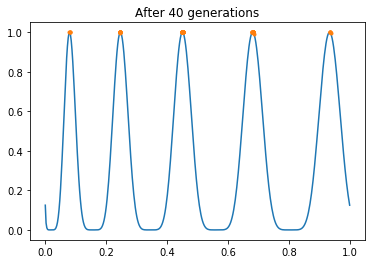

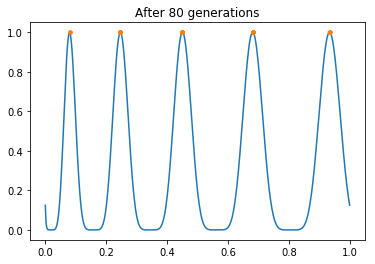

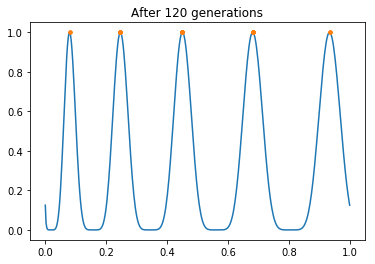

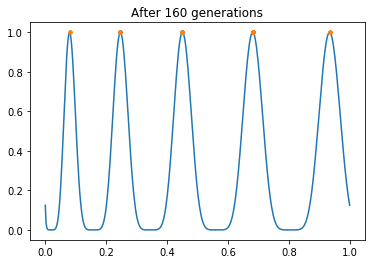

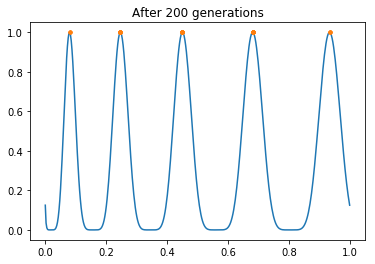

In [14]:
realDCHAEASteps( m3, LIMITS, "realDCHAEA", "M3" )

### M4

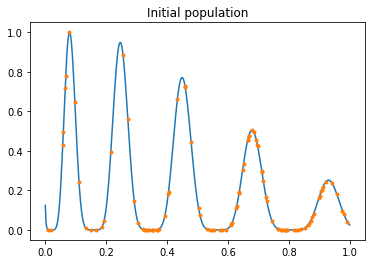

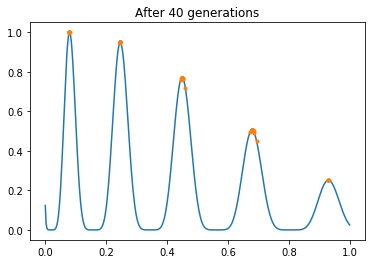

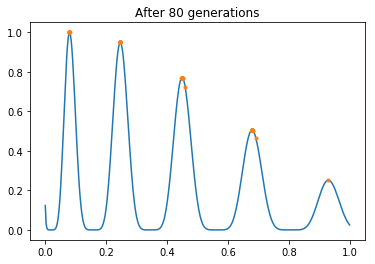

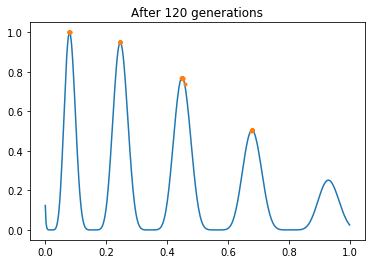

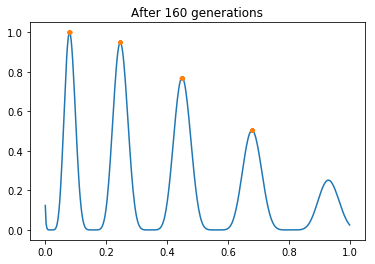

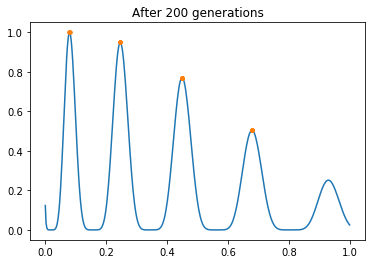

In [15]:
realDCHAEASteps( m4, LIMITS, "realDCHAEA", "M4" )